In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [263]:
plt.rcParams["figure.figsize"] = (20, 6)

In [264]:
df = pd.read_csv('../data/train.csv')

In [265]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


## Prototype Run 

We'll grab a sample dataset and run it through the process as a prototype so we know what we're coding up.

In [266]:
df_train = df[(df.Store==1) & (df.Dept==1)][0:-3]
df_test = df[(df.Store==1) & (df.Dept==1)][-3:]
df_train['Date'] = pd.to_datetime(df['Date'])
df_test['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df_train.tail()

In [256]:
df_test

,Store,Dept,Date,Weekly_Sales,IsHoliday
140,1,1,2012-10-12,22764.01,False
141,1,1,2012-10-19,24185.27,False
142,1,1,2012-10-26,27390.81,False


In [257]:
# Get Holidays
holidays = df[(df.Store==1) & (df.Dept==1) & (df.IsHoliday==True)].ds

df_holidays = pd.DataFrame({
    'holiday': 'holiday',
    'ds': holidays
})

df_holidays

AttributeError: 'DataFrame' object has no attribute 'ds'

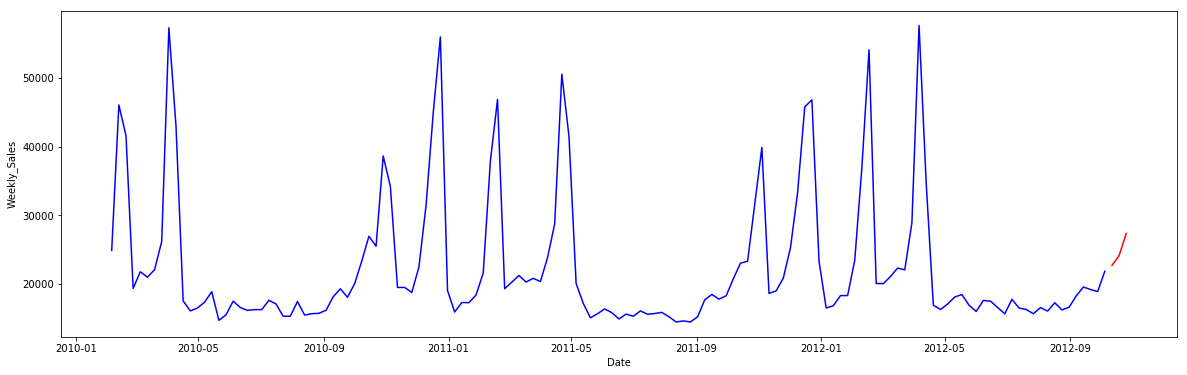

In [173]:
sns.lineplot(data=df_train, x='Date', y='Weekly_Sales', color='blue')
sns.lineplot(data=df_test, x='Date', y='Weekly_Sales', color='red')

In [244]:
from fbprophet import Prophet

In [245]:
# Prepare dataframe for Prophet
df_train.rename(columns={'Date': 'ds', 'Weekly_Sales':'y'}, inplace=True)
model = Prophet(holidays=df_holidays)
model.fit(df_train)
future = model.make_future_dataframe(periods=3, freq='7D')
forecast = model.predict(future)

/Users/kai/anaconda3/envs/kai/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/kai/anaconda3/envs/kai/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


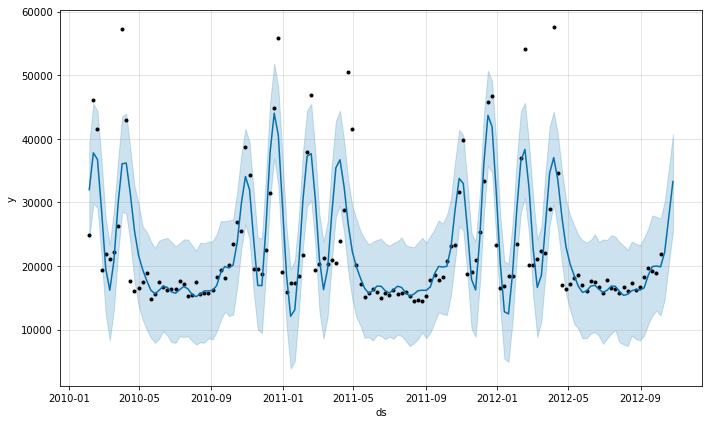

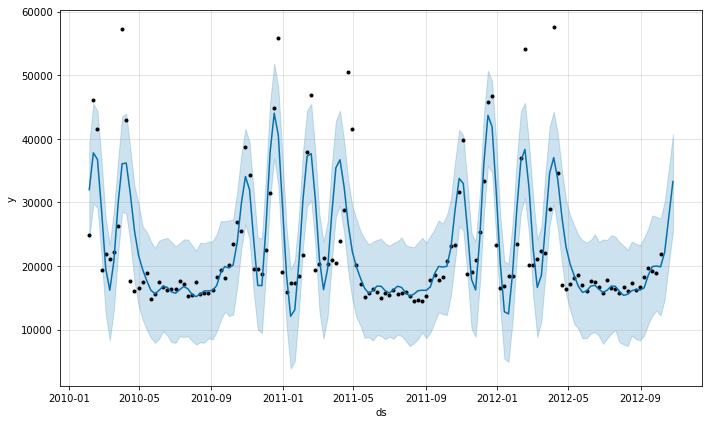

In [246]:
model.plot(forecast)

In [267]:
RMSE = np.sqrt(np.sum((forecast.yhat[-3:] - df_test.Weekly_Sales)**2 / df_test.size))

In [268]:
RMSE

1785.1468980149734

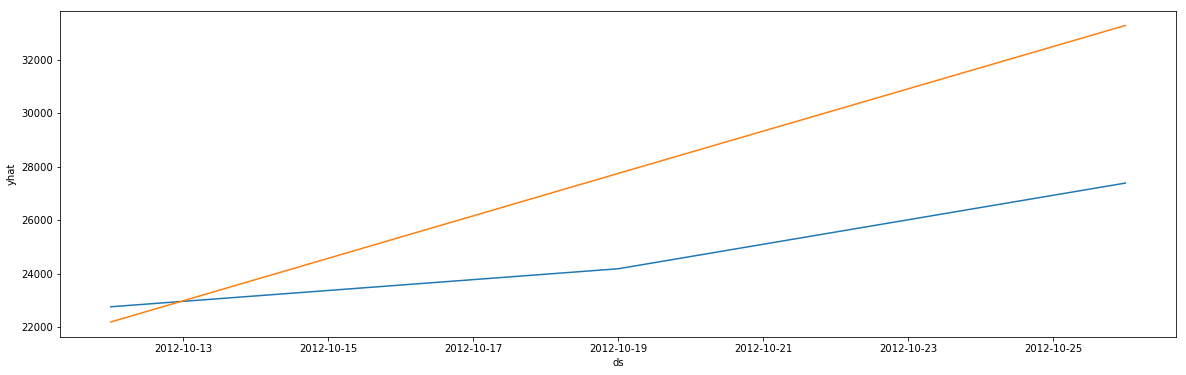

In [249]:
sns.lineplot(data=df_test, x='Date', y='Weekly_Sales')
sns.lineplot(data=forecast[-3:], x='ds', y='yhat')

In [250]:
df_test

,Store,Dept,Date,Weekly_Sales,IsHoliday
140,1,1,2012-10-12,22764.01,False
141,1,1,2012-10-19,24185.27,False
142,1,1,2012-10-26,27390.81,False


In [251]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holiday,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,22741.218509,24311.716493,39352.676171,22741.218509,22741.218509,9270.868918,9270.868918,9270.868918,0.000000,...,0.000000,0.000000,0.000000,9270.868918,9270.868918,9270.868918,0.0,0.0,0.0,32012.087427
1,2010-02-12,22742.762325,29871.258272,45548.081238,22742.762325,22742.762325,15057.757615,15057.757615,15057.757615,-332.582398,...,-332.582398,-332.582398,-332.582398,15390.340014,15390.340014,15390.340014,0.0,0.0,0.0,37800.519941
2,2010-02-19,22744.306142,29140.504825,44394.031856,22744.306142,22744.306142,14013.429336,14013.429336,14013.429336,0.000000,...,0.000000,0.000000,0.000000,14013.429336,14013.429336,14013.429336,0.0,0.0,0.0,36757.735477
3,2010-02-26,22745.849958,21376.616500,36477.216247,22745.849958,22745.849958,5947.540530,5947.540530,5947.540530,0.000000,...,0.000000,0.000000,0.000000,5947.540530,5947.540530,5947.540530,0.0,0.0,0.0,28693.390488
4,2010-03-05,22747.393774,12400.319050,27458.705684,22747.393774,22747.393774,-3137.100905,-3137.100905,-3137.100905,0.000000,...,0.000000,0.000000,0.000000,-3137.100905,-3137.100905,-3137.100905,0.0,0.0,0.0,19610.292869
5,2010-03-12,22748.937604,8309.672781,23349.188352,22748.937604,22748.937604,-6552.597998,-6552.597998,-6552.597998,0.000000,...,0.000000,0.000000,0.000000,-6552.597998,-6552.597998,-6552.597998,0.0,0.0,0.0,16196.339606
6,2010-03-19,22750.481434,13152.263776,28802.698557,22750.481434,22750.481434,-1913.481302,-1913.481302,-1913.481302,0.000000,...,0.000000,0.000000,0.000000,-1913.481302,-1913.481302,-1913.481302,0.0,0.0,0.0,20837.000132
7,2010-03-26,22752.025263,21831.522925,36527.345749,22752.025263,22752.025263,6926.927110,6926.927110,6926.927110,0.000000,...,0.000000,0.000000,0.000000,6926.927110,6926.927110,6926.927110,0.0,0.0,0.0,29678.952373
8,2010-04-02,22753.569093,28552.254421,43557.097524,22753.569093,22753.569093,13328.823845,13328.823845,13328.823845,0.000000,...,0.000000,0.000000,0.000000,13328.823845,13328.823845,13328.823845,0.0,0.0,0.0,36082.392938
9,2010-04-09,22755.112923,28206.653022,43963.354518,22755.112923,22755.112923,13428.828393,13428.828393,13428.828393,0.000000,...,0.000000,0.000000,0.000000,13428.828393,13428.828393,13428.828393,0.0,0.0,0.0,36183.941315
